# Capstone 2: Data Wrangling

### Lisa Patel

### Recap of data science problem

The Online Shoppers Purchasing Intent Dataset consists of feature vectors belonging to 12,330 sessions.The dataset was formed so that each session would belong to a different user in a 1-year period to avoidany tendency to a specific campaign, special day, user profile, or period.

The main objective revolves around the identification of key metrics which contributes the most towards predicting a shopper's behavior and website abandonment likelihood. Along the way, we also suggest prioritized critical recommendations and performance improvements to increase our target feature, Revenue.

### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Data In

In [3]:
data = pd.read_csv('online_shoppers_intention (1).csv')

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data.describe(include = 'bool')

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


### Descriptions of Columns

The dataset has 10 numerical features and 8 categorical features. Taking a look at the dataset description:

Column Descriptions:

Administrative: Number of pages of this type (administrative) that the user visited.

Administrative_Duration: Amount of time spent in this category of pages.

Informational: Number of pages of this type (informational) that the user visited.

Informational_Duration: Amount of time spent in this category of pages.

ProductRelated: Number of pages of this type (product related) that the user visited.

ProductRelated_Duration: Time spent in this category of pages.

BounceRates: The percentage of people who leave your website after visiting only a single page. Here are some scenarios that count as a bounce on your website:  <br>
    Someone clicks the back button after viewing a single page.  <br>
    Someone exits their browser after viewing a single page.  <br>
    A user clicks to another website that takes them elsewhere after viewing only a single page on your site
    
ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [10]:
#Checking for null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

First glance at the columns shows no values are missing from any of the columns. To be perfectly, we can also look at each column for strange values. 


In [11]:
#Function for describe every column:

def describe_column(df, col):
    print(f'Columns: {col}  -  Type of Columns: {df[col].dtype}')
    print(f'Number of null values: {df[col].isnull().sum()}  -  Number of distinct values: {df[col].nunique()}')
    print('Most frequent values:')
    for i, v in df[col].value_counts().iloc[:20].items() :
        print(i, '\t', v)

In [12]:
describe_column(data, 'Administrative')

Columns: Administrative  -  Type of Columns: int64
Number of null values: 0  -  Number of distinct values: 27
Most frequent values:
0 	 5768
1 	 1354
2 	 1114
3 	 915
4 	 765
5 	 575
6 	 432
7 	 338
8 	 287
9 	 225
10 	 153
11 	 105
12 	 86
13 	 56
14 	 44
15 	 38
16 	 24
17 	 16
18 	 12
19 	 6


In [54]:
describe_column(data, 'Revenue')

Columns: Revenue  -  Type of Columns: bool
Number of null values: 0  -  Number of distinct values: 2
Most frequent values:
False 	 10422
True 	 1908


In [58]:
describe_column(data, 'BounceRates')

Columns: BounceRates  -  Type of Columns: float64
Number of null values: 0  -  Number of distinct values: 1872
Most frequent values:
0.0 	 5518
0.2 	 700
0.066666667 	 134
0.028571429 	 115
0.05 	 113
0.033333333 	 101
0.025 	 100
0.016666667 	 99
0.1 	 98
0.04 	 96
0.02 	 91
0.022222222000000003 	 88
0.0125 	 85
0.018181818 	 81
0.015384615 	 76
0.014285714 	 73
0.008333333 	 72
0.011111111000000002 	 62
0.01 	 61
0.013333333000000001 	 54


In [55]:
describe_column(data, 'Administrative_Duration')


Columns: Administrative_Duration  -  Type of Columns: float64
Number of null values: 0  -  Number of distinct values: 3335
Most frequent values:
0.0 	 5903
4.0 	 56
5.0 	 53
7.0 	 45
11.0 	 42
6.0 	 41
14.0 	 37
9.0 	 35
15.0 	 33
10.0 	 32
19.0 	 29
13.0 	 29
12.0 	 28
21.0 	 28
8.0 	 26
3.0 	 26
18.0 	 26
20.0 	 26
17.0 	 25
37.0 	 24


In [18]:
describe_column(data, 'Informational') 


Columns: Informational  -  Type of Columns: int64
Number of null values: 0  -  Number of distinct values: 17
Most frequent values:
0 	 9699
1 	 1041
2 	 728
3 	 380
4 	 222
5 	 99
6 	 78
7 	 36
9 	 15
8 	 14
10 	 7
12 	 5
14 	 2
11 	 1
13 	 1
24 	 1
16 	 1


In [19]:
describe_column(data, 'Informational_Duration')

Columns: Informational_Duration  -  Type of Columns: float64
Number of null values: 0  -  Number of distinct values: 1258
Most frequent values:
0.0 	 9925
9.0 	 33
6.0 	 26
10.0 	 26
7.0 	 26
13.0 	 23
12.0 	 23
8.0 	 22
16.0 	 22
11.0 	 21
17.0 	 18
15.0 	 18
5.0 	 18
23.0 	 17
4.0 	 17
14.0 	 17
18.0 	 17
3.0 	 16
20.0 	 14
21.0 	 14


In [20]:
#Lets instead check for the number of unique values for each feature:

uniques = data.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


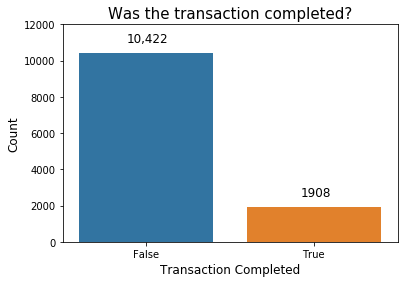

In [41]:
# Visualize the data

sns.countplot(data['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.text(x=-.12, y=11000 ,s='10,422', fontsize=12)
plt.text(x=.92, y=2500, s='1908', fontsize=12)
plt.show()

We can see that the number of entries where the customer ended up not purchasing is much higher that the number of entries where the customer ended up completing a transaction. This makes sense, as a majority of normal online shopping ends without a purchase.

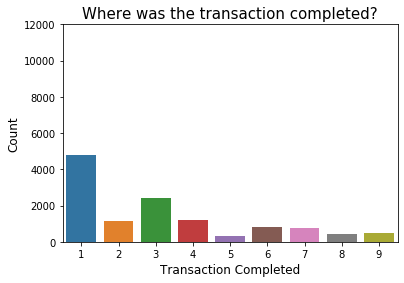

In [61]:
sns.countplot(data['Region'])
plt.ylim(0,12000)
plt.title('Where was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


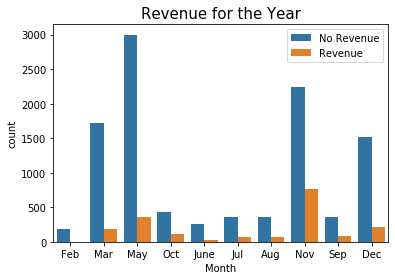

In [62]:
#Revenue for a year
sns.countplot(data['Month'],hue=data.Revenue)
plt.title('Revenue for the Year', size = 15)
L=plt.legend(loc = 'best')
L.get_texts()[0].set_text('No Revenue')
L.get_texts()[1].set_text('Revenue')
plt.show()

In [48]:
df = pd.DataFrame(data)

In [49]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

It seems the dataset is missing data from the months of January, April, and October. Something to keep in mind for the analysis. 

Converted to a pandas dataframe for future complex manipulations.

Next, we will move on to creating a correlation map, which might give additional information about what columns can be dropped from the dataframe. 

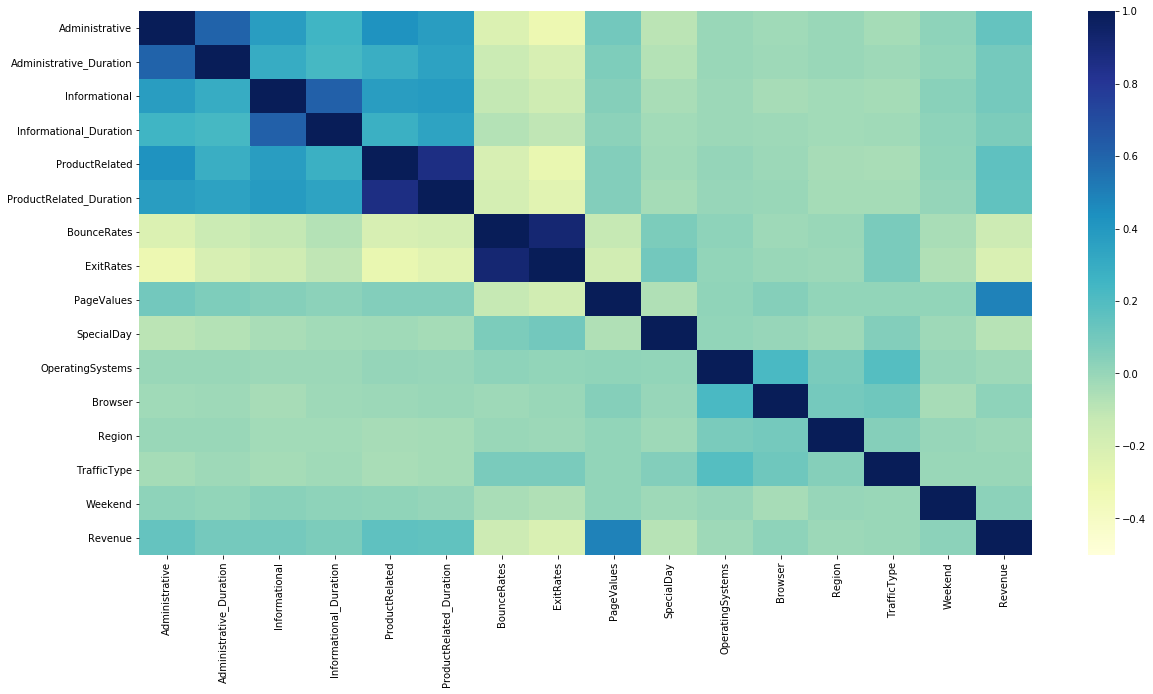

In [52]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, vmin=-0.5, cmap="YlGnBu")

Initial look at the correlation map indicates the PageValues column is strongly correlated with Revenue. Not strongly correlated with the target column are ExitRates and BounceRates which make sense since it means people are leaving the site before making a purchase. 

Bounce rate is the overall percentage of a single engagement session whereas exit rate is the percentage of exits from a page. The former is calculated by dividing the aggregation of one-page visits to the overall entrance visits whereas latter is calculated by dividing the aggregation of total exits from a page to the total visits to a page. One major difference between these is that exit rate is related to the overall percentage of visitors that were within the last session whereas bounce rates account for the percentage of visitors that were part of that one and only session. In other words, prior activity is not considered in the case of bounce rates. 

A high bounce rate could indicate issues with user satisfaction from technical reasons such as unfriendly UI of the website, extremely slow throughput or other matters. According to BigCommerce, A bounce rate between 30% to 55% is acceptable. Our analysis shows the bounce rates largely scattered lower than 10%. According to UpSide Business, a bounce rate lower than 5% is a cause of concern indicating a possibility of the Google Analytics code was inserted twice. Hence more investigation is needed on these data. Given that there is indeed no error, we could look for ways to optimize bounce rates and exit rates to ensure saving sales and securing customer loyalty.



This concludes the data wrangling step of the data science workflow. We explored the dataset and did not find many missing or strange values that needed to be dropped or altered. By looking at the revenue rate for the entire year, we discovered a couple of months that did not have data associated. 

The correlation map also provided a preview for the important features we should monitor in our later analysis. 

#### Sources: 

1) https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset  <br>
2) https://www.bigcommerce.com/blog/bounce-rates/#this-bounce-rate-equation-doesnt-tell-the-whole-story  <br>
3) https://upsidebusiness.com/blog/my-website-bounce-rate-is-5-is-that-too-low-is-it-too-good-to-be-true/